In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
idvfc = pd.read_csv("idvfc_marzo2022_limpio.csv", encoding='latin1')
idvfc_2021 = pd.read_csv("idvfc_2021.csv", encoding='latin1')
idvfc_2020 = pd.read_csv("idvfc_2020.csv", encoding='latin1')
idvfc_2019 = pd.read_csv("idvfc_2019.csv", encoding='latin1')
idvfc_2018 = pd.read_csv("idvfc_2018.csv", encoding='latin1')
idvfc_2017 = pd.read_csv("idvfc_2017.csv", encoding='latin1')
idvfc_2016 = pd.read_csv("idvfc_2016.csv", encoding='latin1')
idvfc_2015 = pd.read_csv("idvfc_2015.csv", encoding='latin1')

In [3]:
idvfc_2018

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Enero,Febrero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2018,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2018,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2018,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1244,2018,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,2018,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,Mujer,No especificado,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1246,2018,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,No especificado,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#TIDY DATA DE TODOS LOS AÑOS
idvfc_molten =  pd.melt(idvfc, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_molten

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Mes,value
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),Enero,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),Enero,0.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),Enero,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0.0
...,...,...,...,...,...,...,...,...,...,...
119803,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,Diciembre,0.0
119804,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,Diciembre,0.0
119805,2022,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,Mujer,No especificado,Diciembre,0.0
119806,2022,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,No especificado,Diciembre,0.0


In [8]:
#Molten all DataFrames (CADA AÑO)

idvfc_2021 =  pd.melt(idvfc_2021, id_vars=['Ano','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_2020 =  pd.melt(idvfc_2020, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_2019 =  pd.melt(idvfc_2019, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_2018 =  pd.melt(idvfc_2018, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_2017 =  pd.melt(idvfc_2017, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_2016 =  pd.melt(idvfc_2016, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')
idvfc_2015 =  pd.melt(idvfc_2015, id_vars=['AÃ±o','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')


In [9]:
from datetime import datetime
import locale 
locale.setlocale(locale.LC_ALL, 'es_ES')

'es_ES'

In [10]:
#CONVERT TO DATATYPE ALL DATAFRAMES
idvfc_molten['Fecha'] = pd.to_datetime(idvfc_molten['AÃ±o'].astype(str)  + idvfc_molten['Mes'], format='%Y%B')
idvfc_2021['Fecha'] = pd.to_datetime(idvfc_2021['Ano'].astype(str)  + idvfc_2021['Mes'], format='%Y%B')
idvfc_2020['Fecha'] = pd.to_datetime(idvfc_2020['AÃ±o'].astype(str)  + idvfc_2020['Mes'], format='%Y%B')
idvfc_2019['Fecha'] = pd.to_datetime(idvfc_2019['AÃ±o'].astype(str)  + idvfc_2019['Mes'], format='%Y%B')
idvfc_2018['Fecha'] = pd.to_datetime(idvfc_2018['AÃ±o'].astype(str)  + idvfc_2018['Mes'], format='%Y%B')
idvfc_2017['Fecha'] = pd.to_datetime(idvfc_2017['AÃ±o'].astype(str)  + idvfc_2017['Mes'], format='%Y%B')
idvfc_2016['Fecha'] = pd.to_datetime(idvfc_2016['AÃ±o'].astype(str)  + idvfc_2016['Mes'], format='%Y%B')
idvfc_2015['Fecha'] = pd.to_datetime(idvfc_2015['AÃ±o'].astype(str)  + idvfc_2015['Mes'], format='%Y%B')


idvfc_molten.set_index('Fecha', inplace=True)
idvfc_2021.set_index('Fecha', inplace=True)
idvfc_2020.set_index('Fecha', inplace=True)
idvfc_2019.set_index('Fecha', inplace=True)
idvfc_2018.set_index('Fecha', inplace=True)
idvfc_2017.set_index('Fecha', inplace=True)
idvfc_2016.set_index('Fecha', inplace=True)
idvfc_2015.set_index('Fecha', inplace=True)
#fem2021_molten['Fecha'] = pd.to_datetime(fem2021_molten['Ano'].astype(str)  + fem2021_molten['Mes'], format='%Y%B')

#fem2021_molten['Fecha']=pd.to_datetime(fem2021_molten[['Ano','Mes']], format = "%Y%M").dt.strftime('%Y%M') 
#fem2021_molten.set_index('Fecha', inplace=True)

#check datatype of index


In [11]:
fem_2021 = idvfc_2021.loc[idvfc_2021['Subtipo_de_delito'] == 'Feminicidio']
fem_2021

,Ano,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Mes,value
Fecha,,,,,,,,,,
2021-01-01,2021,1,Aguascalientes,Feminicidio,Feminicidio,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0
2021-01-01,2021,1,Aguascalientes,Feminicidio,Feminicidio,Con arma blanca,Mujer,Menores de edad (0-17),Enero,0
2021-01-01,2021,1,Aguascalientes,Feminicidio,Feminicidio,Con otro elemento,Mujer,Menores de edad (0-17),Enero,0
2021-01-01,2021,1,Aguascalientes,Feminicidio,Feminicidio,No especificado,Mujer,Menores de edad (0-17),Enero,0
2021-01-01,2021,1,Aguascalientes,Feminicidio,Feminicidio,Con arma de fuego,Mujer,Adultos (18 y mÃ¡s),Enero,0
...,...,...,...,...,...,...,...,...,...,...
2021-12-01,2021,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,Adultos (18 y mÃ¡s),Diciembre,0
2021-12-01,2021,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,Diciembre,0
2021-12-01,2021,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,Diciembre,0


In [12]:
fem2021_molten = pd.melt(fem_2021_copy, id_vars=['Ano','Clave_Ent','Entidad','Tipo_de_delito','Subtipo_de_delito','Modalidad','Sexo','Rango_de_edad'],
                                               value_vars=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
                                             , var_name = 'Mes')

NameError: name 'fem_2021_copy' is not defined

In [13]:
to_drop = ['Ano','Tipo_de_delito','Sexo','Mes']
to_drop2 = ['AÃ±o','Tipo_de_delito','Sexo','Mes']

idvfc_molten.drop(to_drop2, inplace =True , axis=1)
idvfc_2021.drop(to_drop, inplace =True , axis=1)
idvfc_2020.drop(to_drop2, inplace =True , axis=1)
idvfc_2019.drop(to_drop2, inplace =True , axis=1)
idvfc_2018.drop(to_drop2, inplace =True , axis=1)
idvfc_2017.drop(to_drop2, inplace =True , axis=1)
idvfc_2016.drop(to_drop2, inplace =True , axis=1)
idvfc_2015.drop(to_drop2, inplace =True , axis=1)


In [14]:
idvfc_molten

,Clave_Ent,Entidad,Subtipo_de_delito,Modalidad,Rango_de_edad,value
Fecha,,,,,,
2015-01-01,1,Aguascalientes,Homicidio doloso,Con arma de fuego,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Homicidio doloso,Con arma blanca,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Homicidio doloso,Con otro elemento,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Homicidio doloso,No especificado,Menores de edad (0-17),0.0
2015-01-01,1,Aguascalientes,Lesiones dolosas,Con arma de fuego,Menores de edad (0-17),0.0
...,...,...,...,...,...,...
2022-12-01,32,Zacatecas,Feminicidio,Con arma de fuego,No especificado,0.0
2022-12-01,32,Zacatecas,Feminicidio,Con arma blanca,No especificado,0.0
2022-12-01,32,Zacatecas,Feminicidio,Con otro elemento,No especificado,0.0


In [15]:
fem_2021 = idvfc_2021.loc[idvfc_2021['Subtipo_de_delito'] == 'Feminicidio']
fem_2020 = idvfc_2020.loc[idvfc_2020['Subtipo_de_delito'] == 'Feminicidio']
fem_2019 = idvfc_2019.loc[idvfc_2019['Subtipo_de_delito'] == 'Feminicidio']
fem_2018 = idvfc_2018.loc[idvfc_2018['Subtipo_de_delito'] == 'Feminicidio']
fem_2017 = idvfc_2017.loc[idvfc_2017['Subtipo_de_delito'] == 'Feminicidio']
fem_2016 = idvfc_2016.loc[idvfc_2016['Subtipo_de_delito'] == 'Feminicidio']
fem_2015 = idvfc_2015.loc[idvfc_2015['Subtipo_de_delito'] == 'Feminicidio']

In [16]:
fem_dict = {'2021': fem_2021['value'],
           '2020': fem_2020['value'],
            '2019': fem_2019['value'],
          '2018': fem_2018['value'],
          '2017': fem_2017['value'],
          '2016': fem_2016['value'],
          '2015': fem_2015['value']}

<AxesSubplot:xlabel='Fecha'>

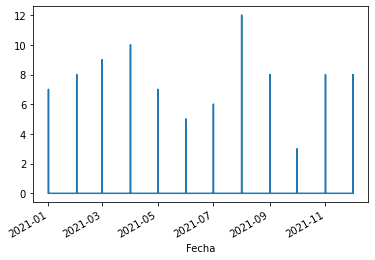

In [17]:
val = fem_2021['value']
val.plot()

In [18]:
subtipo_delito = idvfc_molten.Subtipo_de_delito.unique()
delitos = {}

for delito in subtipo_delito:
    sub_del = idvfc_molten.loc[idvfc_molten['Subtipo_de_delito'] == delito]
    delitos[delito] = sub_del['value']




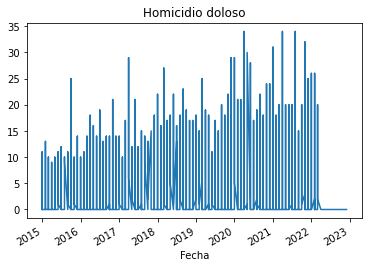

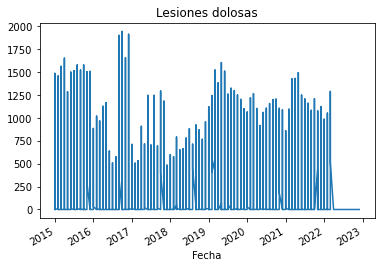

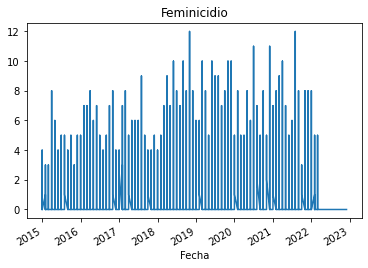

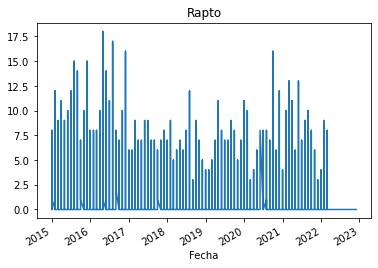

In [19]:
for key, value in delitos.items():
    value.plot()
    plt.title(key)
    plt.show()

In [20]:
delitos_2021 = {}

for delito in subtipo_delito:
    sub_del = idvfc_2021.loc[idvfc_2021['Subtipo_de_delito'] == delito]
    delitos_2021[delito] = sub_del['value']

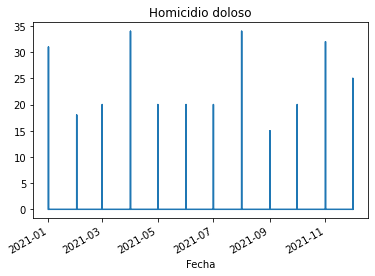

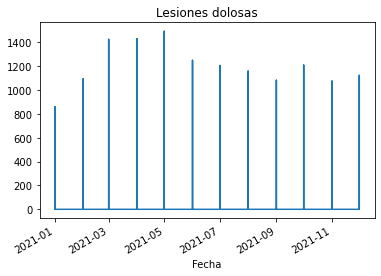

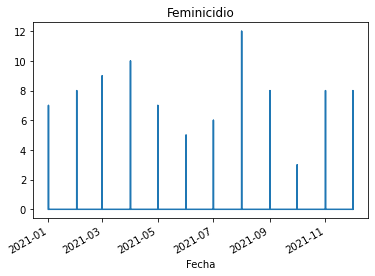

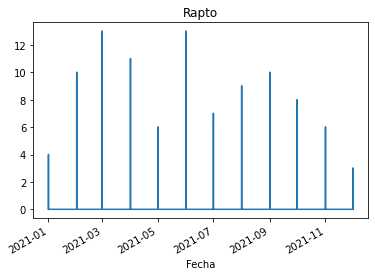

In [21]:
for key, value in delitos_2021.items():
    value.plot()
    plt.title(key)
    plt.show()

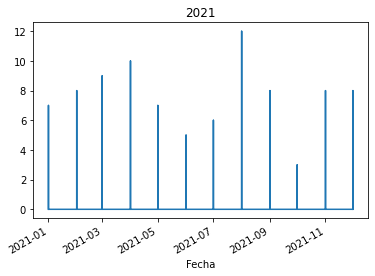

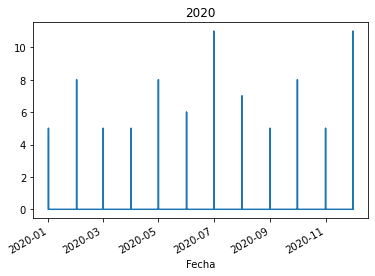

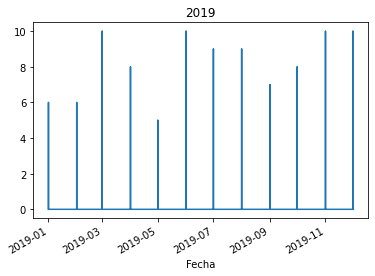

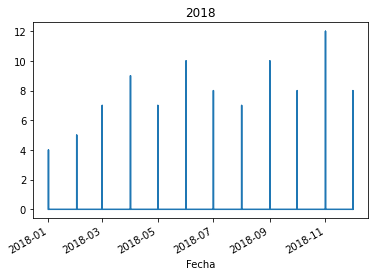

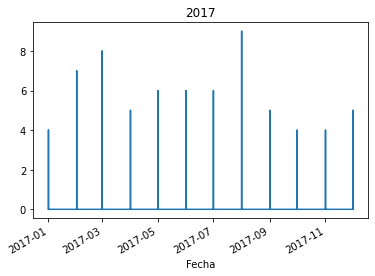

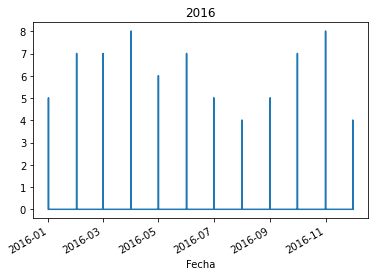

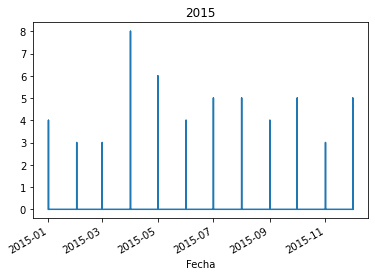

In [22]:
for key, value in fem_dict.items():
    value.plot()
    plt.title(key)
    plt.show()

In [23]:
#Extract time series for each state and indicator  (me falta lo demas)

subtipo_delito = idvfc_molten.Subtipo_de_delito.unique()


delitos = {}
homicidio = {}
rapto = {}
lesion = {}


for delito in subtipo_delito:
    sub_del = idvfc_molten.loc[idvfc_molten['Subtipo_de_delito'] == delito]
    delitos[delito] = sub_del['value']
    #homicidio[delito] = sub_del['value']
    #rapto[delito] = sub_del['value']
    #lesion[delito] = sub_del['value']
    
    #retail[estado] = lugar_estado['retail_and_recreation_percent_change_from_baseline']
    #grocery[estado] = lugar_estado['grocery_and_pharmacy_percent_change_from_baseline']
    #parks[estado] = lugar_estado['parks_percent_change_from_baseline']
    #transit[estado] = lugar_estado['transit_stations_percent_change_from_baseline']
    #workplaces[estado] = lugar_estado['workplaces_percent_change_from_baseline']
    #residential[estado] = lugar_estado['residential_percent_change_from_baseline']


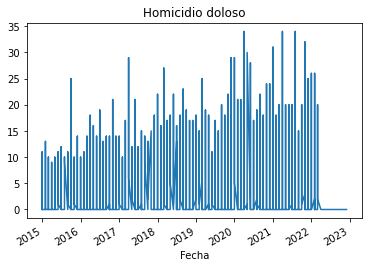

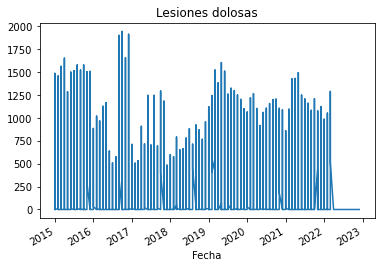

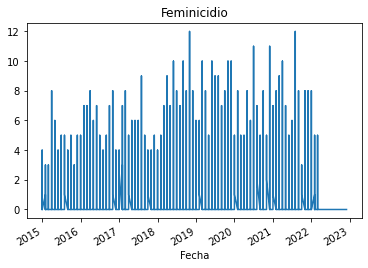

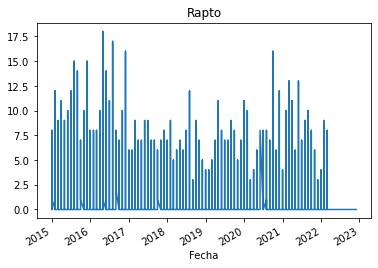

In [24]:
for key, value in delitos.items():
    value.plot()
    plt.title(key)
    plt.show()

In [25]:
grp_subdelito=idvfc.groupby(['Subtipo_de_delito'])


In [26]:
selected_group = grp_subdelito.get_group('Feminicidio')

In [27]:
fem= selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()
fem

AÃ±o  Subtipo_de_delito
2015  Feminicidio           427.0
2016  Feminicidio           647.0
2017  Feminicidio           766.0
2018  Feminicidio           918.0
2019  Feminicidio           973.0
2020  Feminicidio           977.0
2021  Feminicidio          1015.0
2022  Feminicidio           234.0
Name: Total, dtype: float64

<AxesSubplot:xlabel='AÃ±o,Subtipo_de_delito'>

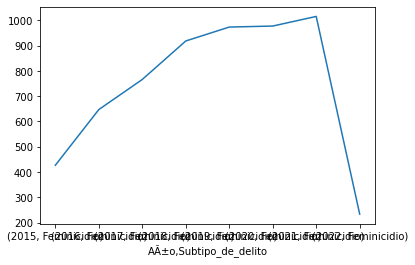

In [28]:
fem.plot()

In [30]:
delitos['Feminicidio']

Fecha
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
             ... 
2022-12-01    0.0
2022-12-01    0.0
2022-12-01    0.0
2022-12-01    0.0
2022-12-01    0.0
Name: value, Length: 36864, dtype: float64

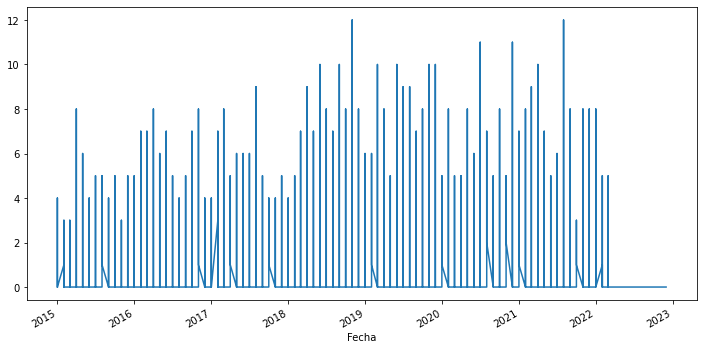

In [32]:
#data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime
ax = delitos['Feminicidio'].plot(x='Fecha', y='value', figsize=(12,6))

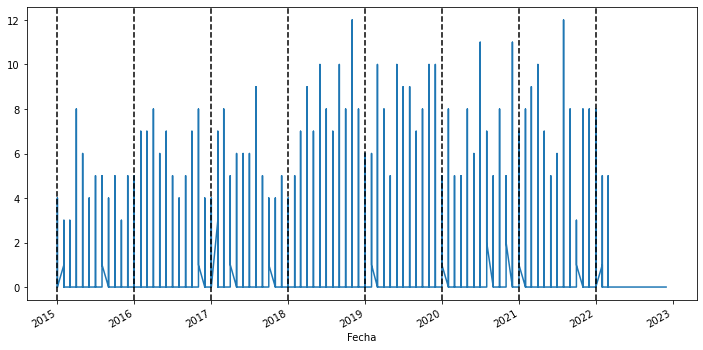

In [33]:
ax = delitos['Feminicidio'].plot(x='Fecha', y='value', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01','2022-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [38]:
analysis = delitos['Feminicidio'].copy()

In [73]:
analysis.

Fecha
2015-01-01    False
2015-01-01    False
2015-01-01    False
2015-01-01    False
2015-01-01    False
              ...  
2022-12-01    False
2022-12-01    False
2022-12-01    False
2022-12-01    False
2022-12-01    False
Name: value, Length: 36864, dtype: bool

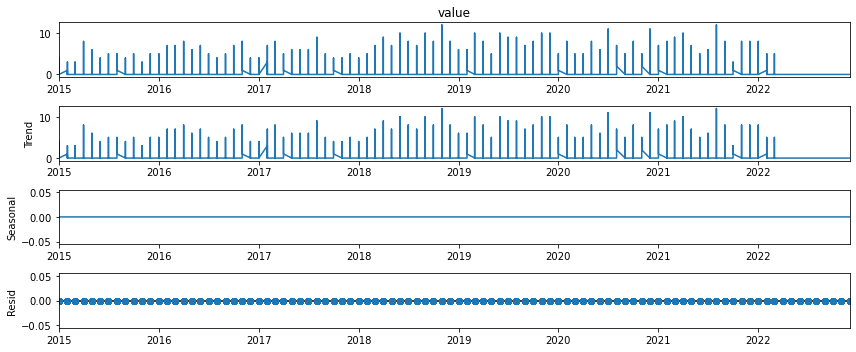

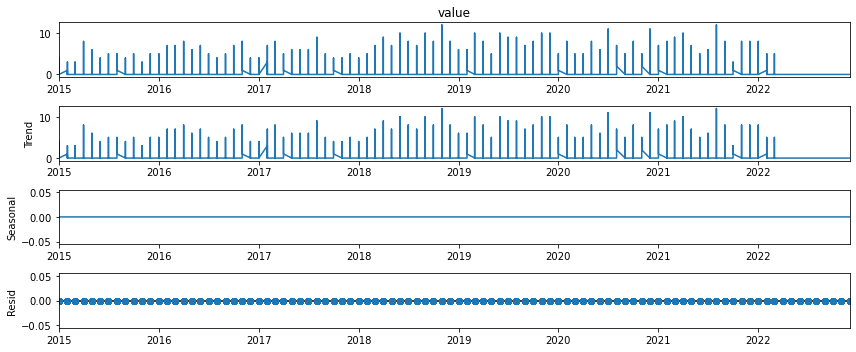

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(analysis,model='additive', extrapolate_trend='freq', period=1)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()